<a href="https://colab.research.google.com/github/rochinha23/Curso-Data-Science-e-Machine-Learning-com-Estatistica-e-Python/blob/main/Visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import io

In [4]:
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo',
                'Idade', 'IrmaosConjuge','PaisFilhos', 'Bilhete', 'Tarifa', 
                'Cabine', 'Embarque']

In [7]:
data.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
data['Sexo'].replace({'male': 'homem', 'female': 'mulher'},inplace=True)

In [9]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan )

In [10]:
data['Cabine']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabine, Length: 891, dtype: object

**Matplotlib** biblioteca principal para visualização de dados

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline #as imagens que formos utilizando/exec serão no proprio notebook 

UsageError: unrecognized arguments: #as imagens que formos utilizando/exec serão no proprio notebook


In [12]:
data['Idade'].isnull().sum()

177

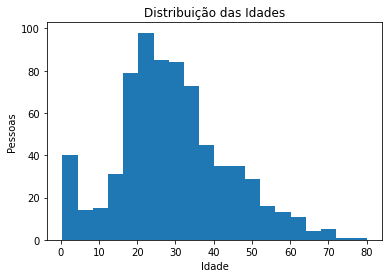

In [13]:
plt.hist(data['Idade'].dropna(), bins=20) #histograma das idades, bins = qtt de barras,para tirar os valores nulos
plt.title('Distribuição das Idades') #coloca o titulo no grafico
plt.ylabel('Pessoas') #descrição eixo y
plt.xlabel('Idade') #descrição eixo x
plt.show() #mostra o grafico apenas, sem o array

In [14]:
data['Classe'].unique()

array([3, 1, 2])

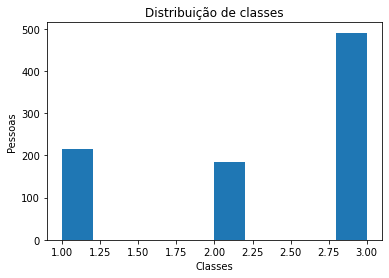

In [15]:
plt.hist(data['Classe'])
plt.title('Distribuição de classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')
plt.show()

**SUBPLOTS - 1ª FORMA**

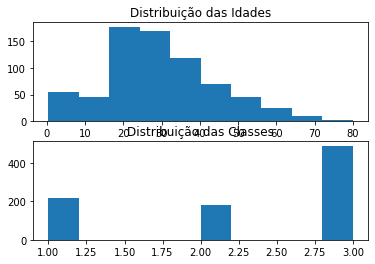

In [16]:
plt.subplot(2,1,1) #2 linha, 1 colunas, plot 1
plt.hist(data['Idade'].dropna())
plt.title('Distribuição das Idades')

plt.subplot(2,1,2) # 2 linha, 1 colunas, plot 2
plt.hist(data['Classe'].dropna())
plt.title('Distribuição das Classes')


plt.show()

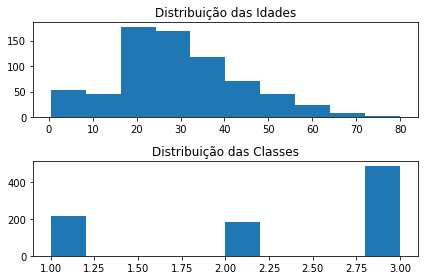

In [17]:
plt.subplot(2,1,1) #2 linha, 1 colunas, plot 1
plt.hist(data['Idade'].dropna())
plt.title('Distribuição das Idades')

plt.subplot(2,1,2) #2 linha, 1 colunas, plot 2
plt.hist(data['Classe'].dropna())
plt.title('Distribuição das Classes')

plt.tight_layout() #não deixa junto as informações do grafico
plt.show()

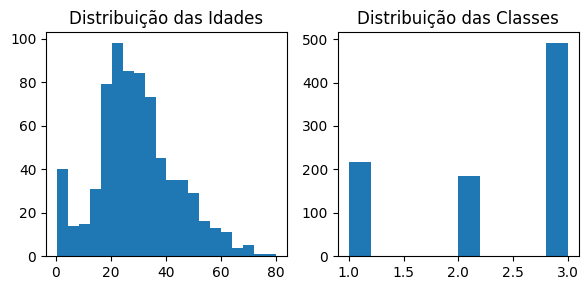

In [18]:
plt.figure(figsize=(6,3),dpi=100)
plt.subplot(1,2,1) #1 linha, 2 colunas, plot 1
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das Idades')

plt.subplot(1,2,2) #1 linha, 2 colunas, plot 2
plt.hist(data['Classe'].dropna())
plt.title('Distribuição das Classes')

plt.tight_layout() #não deixa junto as informações do grafico
plt.show()

**SUBPLOTS - 2ª FORMA**

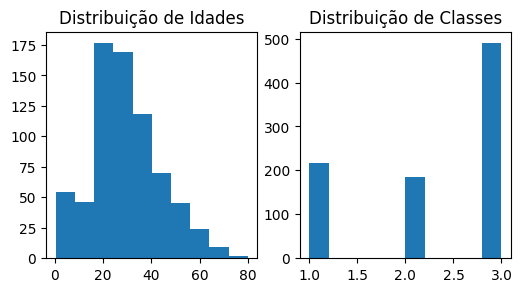

In [19]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi=100) #f=figuras,ax=eixos, 1 linha, 2 colunas,figsize=tamanho da figura,dpi=melhorar a qualidade da imagem
ax[0].hist(data['Idade'].dropna()) #ax é um array então da para selecionar os graficos pelos indices
ax[0].set_title('Distribuição de Idades')
ax[1].hist(data['Classe'])
ax[1].set_title('Distribuição de Classes')

plt.show()

**Seaborn** outra biblioteca de visualização, só que toda baseada na Matplotlib,conseguimos misturar os dois
A ideia do Seaborn é fazer a gente diminuir o que temos que digitar para obter um grafico bonito, uma boa apresentação

In [20]:
import seaborn as sns

In [21]:
data['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [22]:
data['Sexo'].value_counts()

homem     577
mulher    314
Name: Sexo, dtype: int64

In [23]:
data['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

**pie e countplot**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


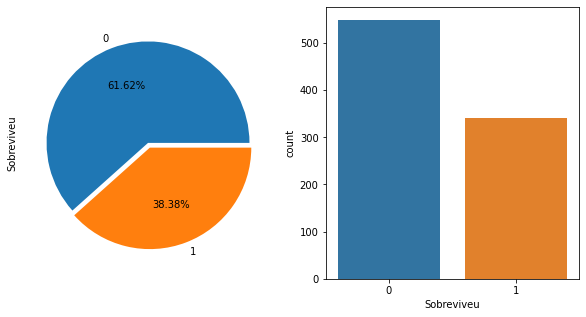

In [24]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(ax=ax[0], explode=[0,0.05], autopct='%0.2f%%')

sns.countplot('Sobreviveu', data=data, ax=ax[1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

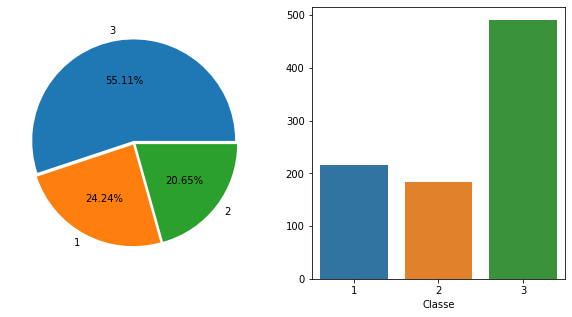

In [25]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Classe'].value_counts().plot.pie(ax=ax[0], explode=[0.02,0.02,0.02], autopct='%0.2f%%')
ax[0].set_ylabel('') 

sns.countplot('Classe', data=data, ax=ax[1])
ax[1].set_ylabel('')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


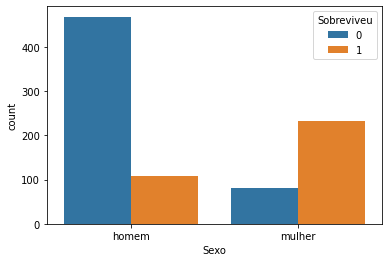

In [26]:
sns.countplot('Sexo', hue='Sobreviveu',data=data)

**boxplot**

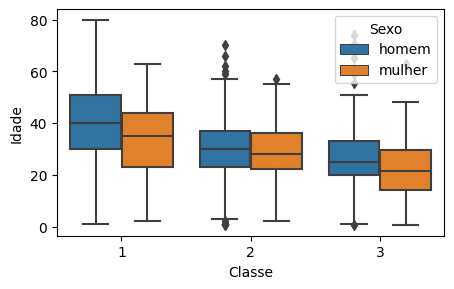

In [27]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe',y='Idade',hue='Sexo',data=data)

**violinplot**

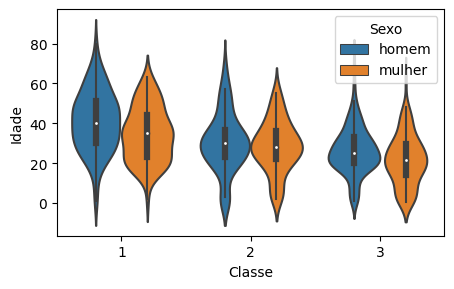

In [28]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='Classe', y='Idade', hue='Sexo', data=data)

**FacetGrid com hist** ajuda a criar multiplos graficos com maior facilidade

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


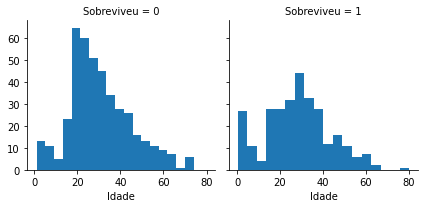

In [29]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

**FacetGrid com barplot**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


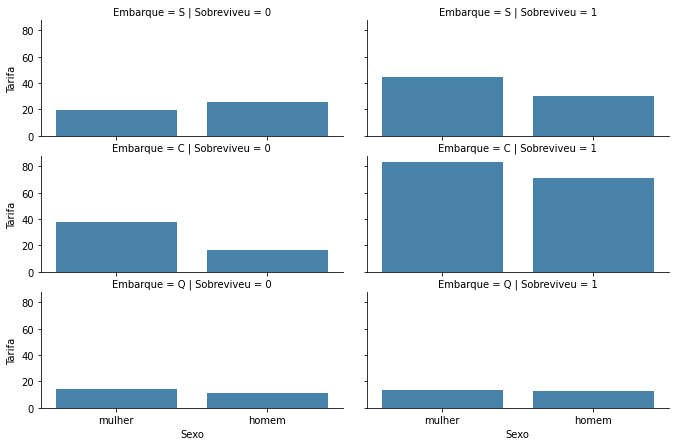

In [30]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
g.map(sns.barplot, 'Sexo', 'Tarifa',alpha=0.9, ci=None) #alpha deixa o grafico transparente, quanto menor o alpha mais transparente, ci=intervalo de confiança

fig=plt.gcf()
fig.set_size_inches(10,6)

**FacetGrid com distplot**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

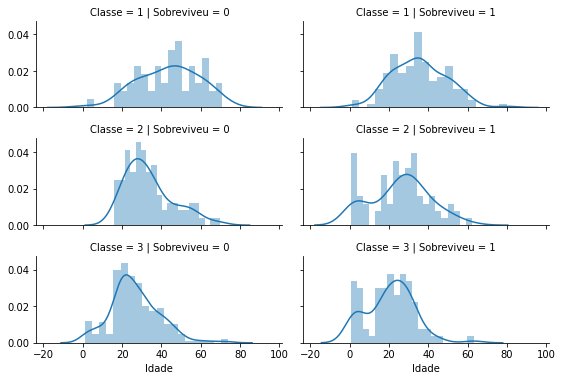

In [31]:
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe', height=1.8,aspect=2.2) #height = altura dos graficos, aspect=largura dos graficos
g.map(sns.distplot, 'Idade', bins=20)

**catplot do tipo "point"**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


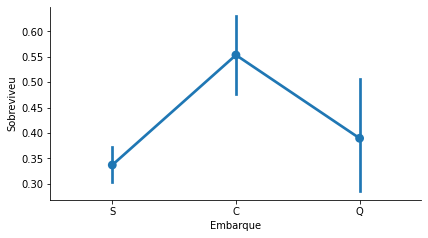

In [32]:
sns.catplot('Embarque', 'Sobreviveu',data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

In [33]:
data['Embarque'].value_counts()

S    644
C    168
Q     77
Name: Embarque, dtype: int64

**FacetGrid com pointplot**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


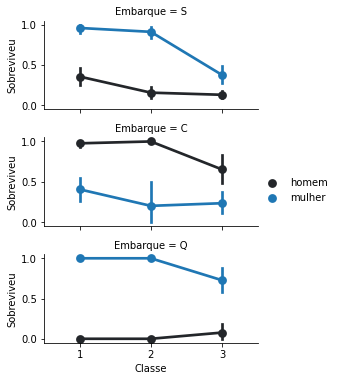

In [34]:
g = sns.FacetGrid(data, row='Embarque', height=1.8, aspect=2.2)
g.map(sns.pointplot,'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()

**heatmap** mapa de calor

In [35]:
data.isnull().sum()

IdPassageiro       0
Sobreviveu         0
Classe             0
Nome               0
Sexo               0
Idade            177
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Cabine           687
Embarque           2
dtype: int64

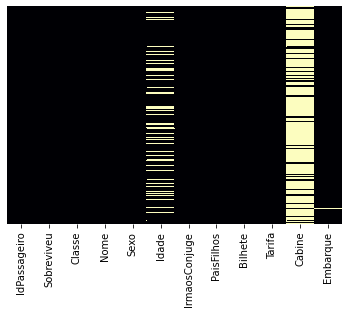

In [36]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='magma')

**relplot**

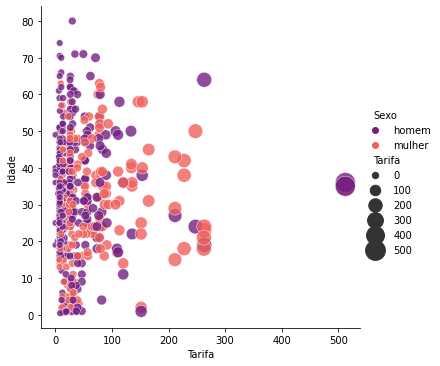

In [37]:
sns.relplot(x='Tarifa',y='Idade', hue='Sexo', data=data, size='Tarifa', sizes=(40,400), alpha=0.8,palette='magma')
plt.show()

**scatterplot**

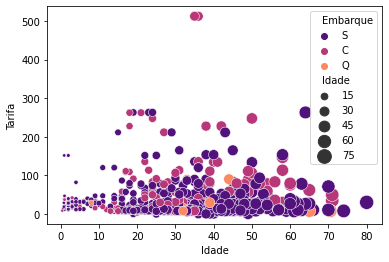

In [38]:
sns.scatterplot(x='Idade',y='Tarifa',hue='Embarque',size='Idade',palette='magma', data=data, sizes=(10,200))

**pairplo** faz um resumo dos dados

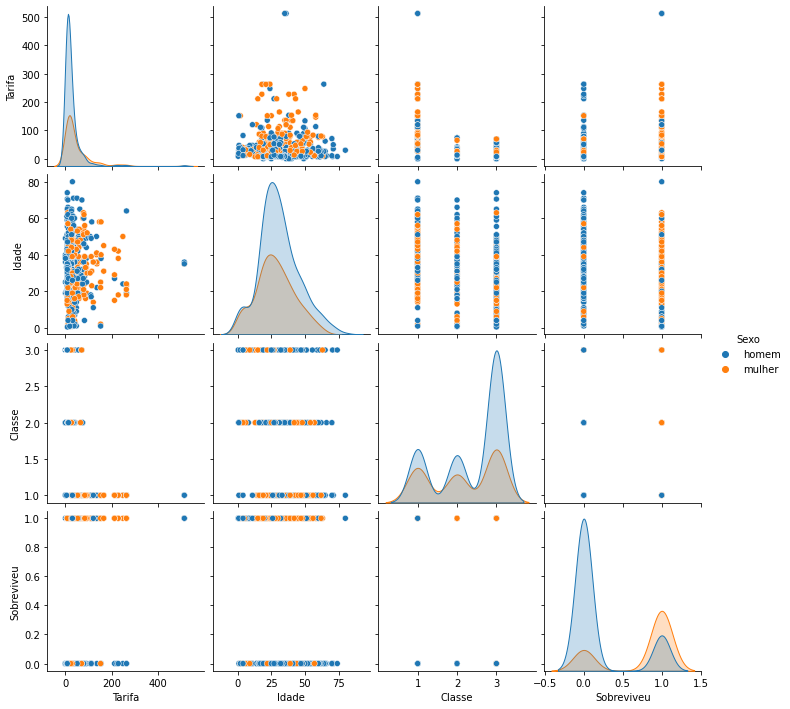

In [39]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe', 'Sexo', 'Embarque', 'Sobreviveu']], hue= 'Sexo')

**jointplots tipo kde** com curva de densidade

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


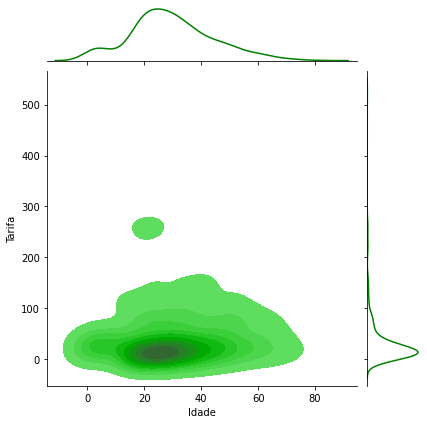

In [40]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='kde', color='g',shade=True) 

**jointplot tipo "reg"**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


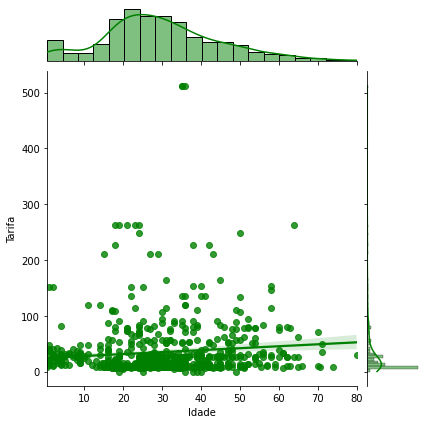

In [41]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='reg', color='g') 

**kdeplot**

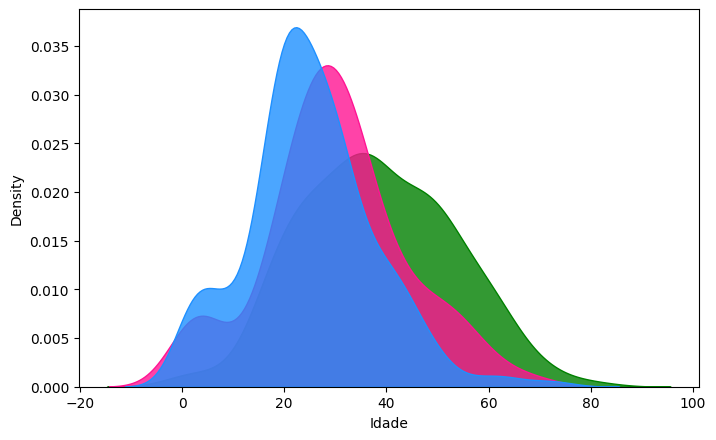

In [42]:
plt.figure(figsize=(8,5), dpi=100)

sns.kdeplot(data['Idade'].loc[data['Classe']==1], shade=True, color='g', label ='1ª Classe', alpha=0.8 )
sns.kdeplot(data['Idade'].loc[data['Classe']==2], shade=True, color='deeppink', label='2ª Classe', alpha=0.8)
sns.kdeplot(data['Idade'].loc[data['Classe']==3], shade=True, color='dodgerblue', label='3ª Classe', alpha=0.8)

plt.show()

**catplot do tipo "count"**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


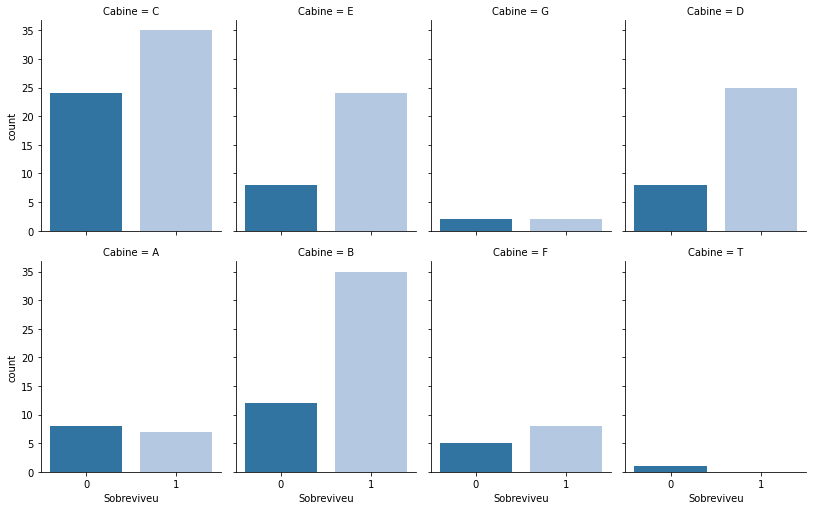

In [46]:
sns.catplot('Sobreviveu', col='Cabine', data=data[['Sobreviveu', 'Cabine']].dropna(), kind='count', height=3.5, aspect=0.8, col_wrap=4, palette='tab20')

plt.show()

**heatmap corr()**

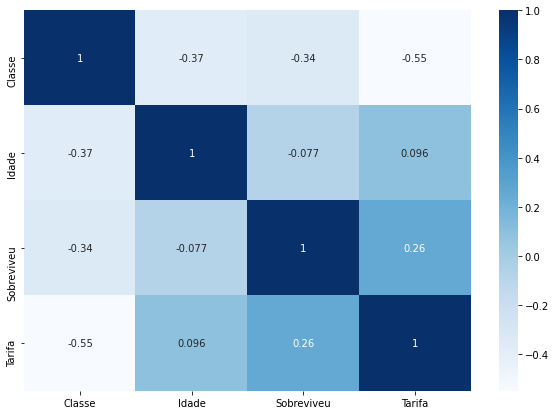

In [47]:
plt.figure(figsize=(10,7))

sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr(), cmap='Blues', annot=True)

In [48]:
data = pd.get_dummies(data=data, columns=['Embarque'],drop_first=True)

In [49]:
data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque_Q', 'Embarque_S']].corr()

,Classe,Idade,Sobreviveu,Tarifa,Embarque_Q,Embarque_S
Classe,1.000000,-0.369226,-0.338481,-0.549500,0.221009,0.081720
Idade,-0.369226,1.000000,-0.077221,0.096067,-0.022405,-0.032523
Sobreviveu,-0.338481,-0.077221,1.000000,0.257307,0.003650,-0.155660
Tarifa,-0.549500,0.096067,0.257307,1.000000,-0.117216,-0.166603
Embarque_Q,0.221009,-0.022405,0.003650,-0.117216,1.000000,-0.496624
Embarque_S,0.081720,-0.032523,-0.155660,-0.166603,-0.496624,1.000000


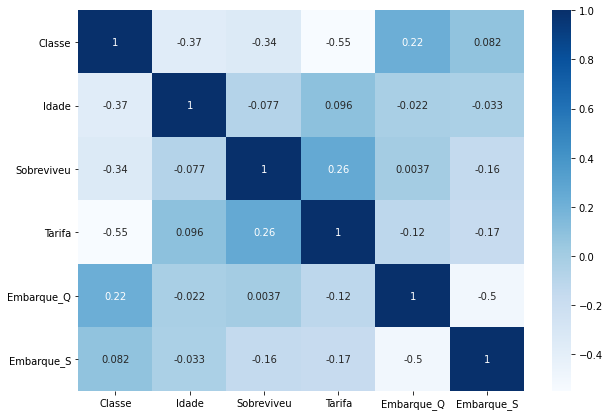

In [50]:
plt.figure(figsize=(10,7))

sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque_Q', 'Embarque_S']].corr(), cmap='Blues', annot=True)

**plot**

In [52]:
x = np.random.normal(10,1,15) #criando 15 elementos | com média 10 | e desvio padrão 1

In [54]:
len(x)

15

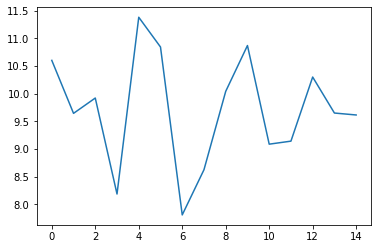

In [55]:
plt.plot(x)

**linspace** cria valores com espaçamento iguais

In [56]:
x = np.linspace(0,20,1000) #criando 1000 numeros igualmente espaçados num intervalo de 0 a 20

In [57]:
x

array([ 0.        ,  0.02002002,  0.04004004,  0.06006006,  0.08008008,
        0.1001001 ,  0.12012012,  0.14014014,  0.16016016,  0.18018018,
        0.2002002 ,  0.22022022,  0.24024024,  0.26026026,  0.28028028,
        0.3003003 ,  0.32032032,  0.34034034,  0.36036036,  0.38038038,
        0.4004004 ,  0.42042042,  0.44044044,  0.46046046,  0.48048048,
        0.5005005 ,  0.52052052,  0.54054054,  0.56056056,  0.58058058,
        0.6006006 ,  0.62062062,  0.64064064,  0.66066066,  0.68068068,
        0.7007007 ,  0.72072072,  0.74074074,  0.76076076,  0.78078078,
        0.8008008 ,  0.82082082,  0.84084084,  0.86086086,  0.88088088,
        0.9009009 ,  0.92092092,  0.94094094,  0.96096096,  0.98098098,
        1.001001  ,  1.02102102,  1.04104104,  1.06106106,  1.08108108,
        1.1011011 ,  1.12112112,  1.14114114,  1.16116116,  1.18118118,
        1.2012012 ,  1.22122122,  1.24124124,  1.26126126,  1.28128128,
        1.3013013 ,  1.32132132,  1.34134134,  1.36136136,  1.38

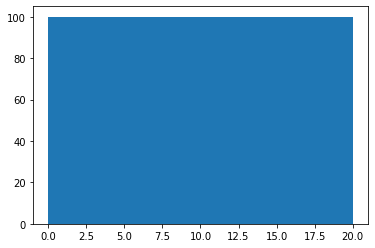

In [58]:
plt.hist(x)
plt.show()

In [60]:
y = 2*x - 5 # equação do primeiro grau

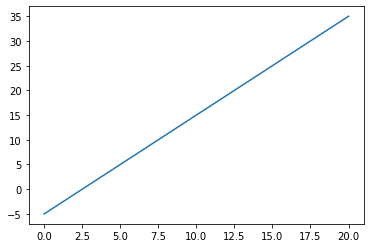

In [61]:
plt.plot(x,y)

In [62]:
y = 2*x**2 - 5*x + 3 #equação do segundo grau

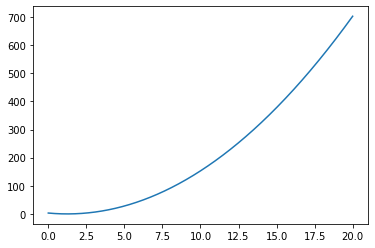

In [63]:
plt.plot(x,y)

In [68]:
y = 9*x**4 + 2*x**2 - 5*x + 3 #equação do terceiro grau

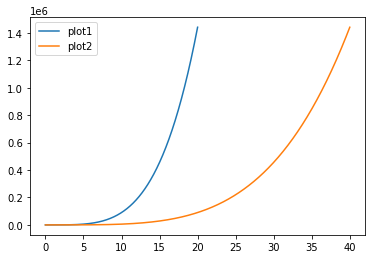

In [70]:
plt.plot(x,y, label='plot1')
plt.plot(x*2,y, label='plot2')

plt.legend()
plt.show()

**normal**

In [71]:
y = np.random.normal(8,2,1000) #criando 1000 elementos normalmente distribuidos
                               # com media 8 | e um desvio padrão de 2

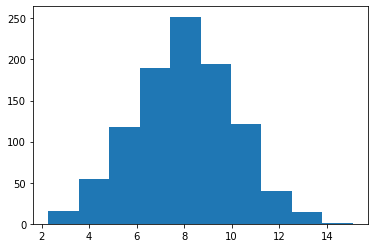

In [73]:
plt.hist(y)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


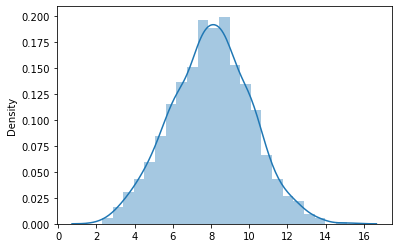

In [74]:
sns.distplot(y)
plt.show()